<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/end_sem_cs575/A2_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS575 End Sem Examination

###**Question 2** - Consider a time series stock values of various companies for a given duration (download using the script below). Your task is to find an appropriate model for the stock prediction. Compare at least with three different models including classical and Machine Learning Models. (submit your code and analysis)

**Name**- Vipin Gupta

**Roll**- 2011MT22 

#**For IBM dataset**

#Downloading & Exporting the dataset

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [ ]:
#download data
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [ ]:
#print first few lines of data
print(ibm.head())

                  High         Low  ...     Volume   Adj Close
Date                                ...                       
2014-08-01  191.500000  188.860001  ...  5181100.0  143.561371
2014-08-04  189.949997  188.600006  ...  2125900.0  143.933304
2014-08-05  189.199997  186.440002  ...  3307900.0  142.005493
2014-08-06  186.880005  184.440002  ...  3847000.0  141.982544
2014-08-07  186.679993  183.580002  ...  2708600.0  140.707535

[5 rows x 6 columns]


In [ ]:
#export and save as csv files
ibm.to_csv('IBM_stock.csv', sep=',')

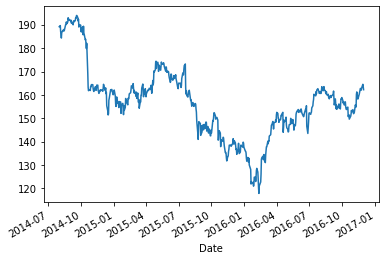

In [ ]:
#Visulaizing the close data
import matplotlib.pyplot as plt
ibm["Close"].plot()

#Exponential smoothing model

In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
n = int(len(ibm["Close"])*0.8)
data = ibm['Close'].to_numpy()
train2 = data[:n]
test2 = data[n:]
date = (ibm.index)

In [ ]:
Exp_model = ExponentialSmoothing(ibm.Close,trend='mul',seasonal='mul',seasonal_periods=4)
ibm['Pred_Exp'] = Exp_model.fit(smoothing_level = 0.9,smoothing_slope= 0.1,smoothing_seasonal = 0.2).fittedvalues.shift(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Prediction using Exponential Smoothing')

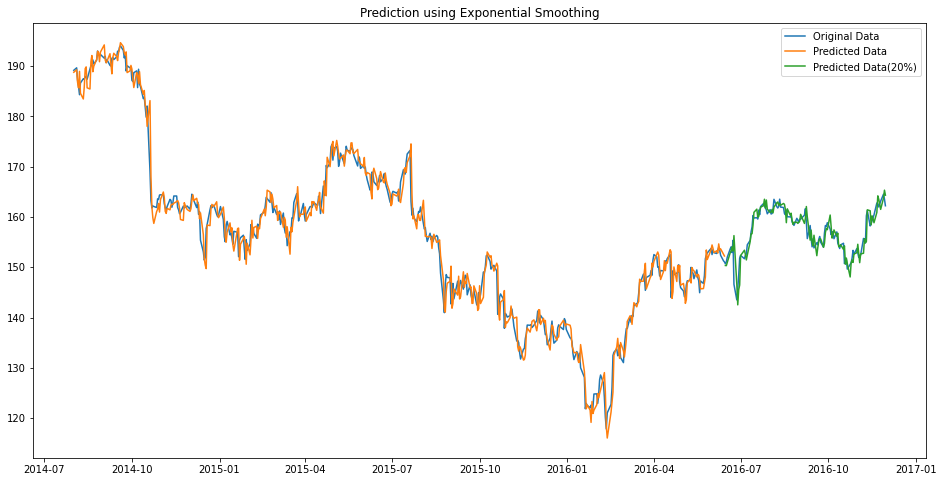

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(date,data, label='Original Data')
plt.plot(date[:n],ibm.Pred_Exp[:n], label='Predicted Data')
plt.plot(date[n:],ibm.Pred_Exp[n:], label='Predicted Data(20%)')
plt.legend()
plt.title('Prediction using Exponential Smoothing')

In [ ]:
#Calculation of MSE for comparing the model
rmse2 = (np.mean(np.power((np.array(test2)-np.array(ibm.Pred_Exp[n:])),2)))
print('MSE value using Exponential Smoothing model: ',rmse2)

MSE value using Exponential Smoothing model:  3.4172334666694675


#ARIMA (p, d, q) model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing data
df = pd.read_csv('IBM_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371
1,2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304
2,2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493
3,2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544
4,2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535


In [ ]:
# Extracting the required columns
df = df[['Date', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    589 non-null    object 
 1   Close   589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
# Changing the Date column to proper DateTime object
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    589 non-null    datetime64[ns]
 1   Close   589 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [ ]:
# Making Date column to be the index
df.columns=['Date','Closing price']
df.set_index('Date', inplace=True)
df.head()

,Closing price
Date,
2014-08-01,189.149994
2014-08-04,189.639999
2014-08-05,187.100006
2014-08-06,185.970001
2014-08-07,184.300003


Text(0.5, 0, 'Year')

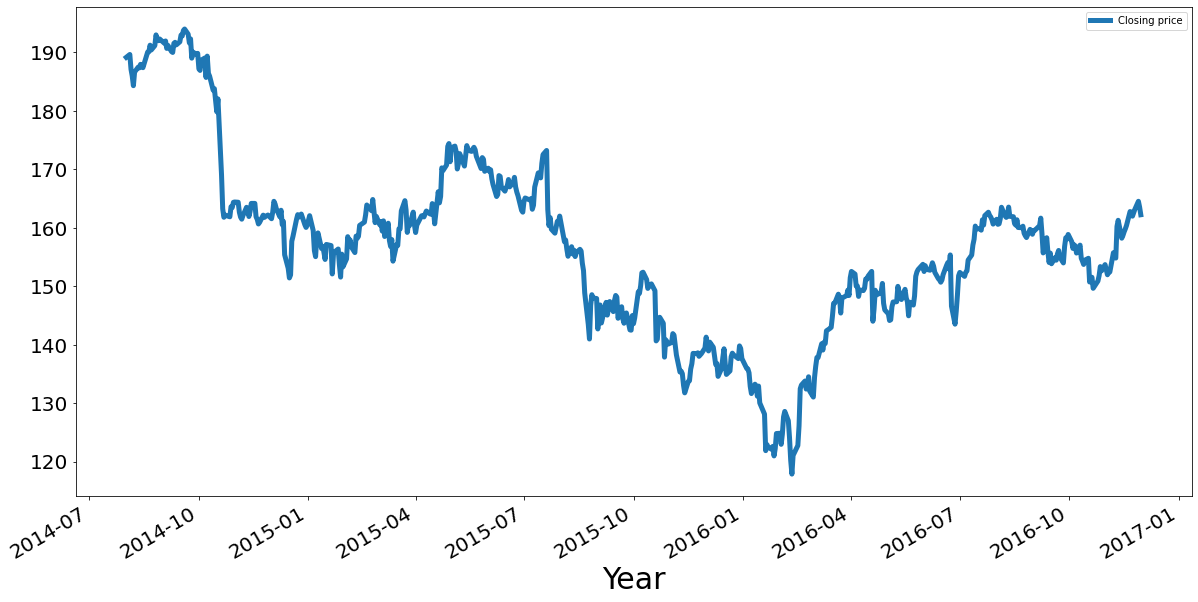

In [ ]:
# Plot
df.plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

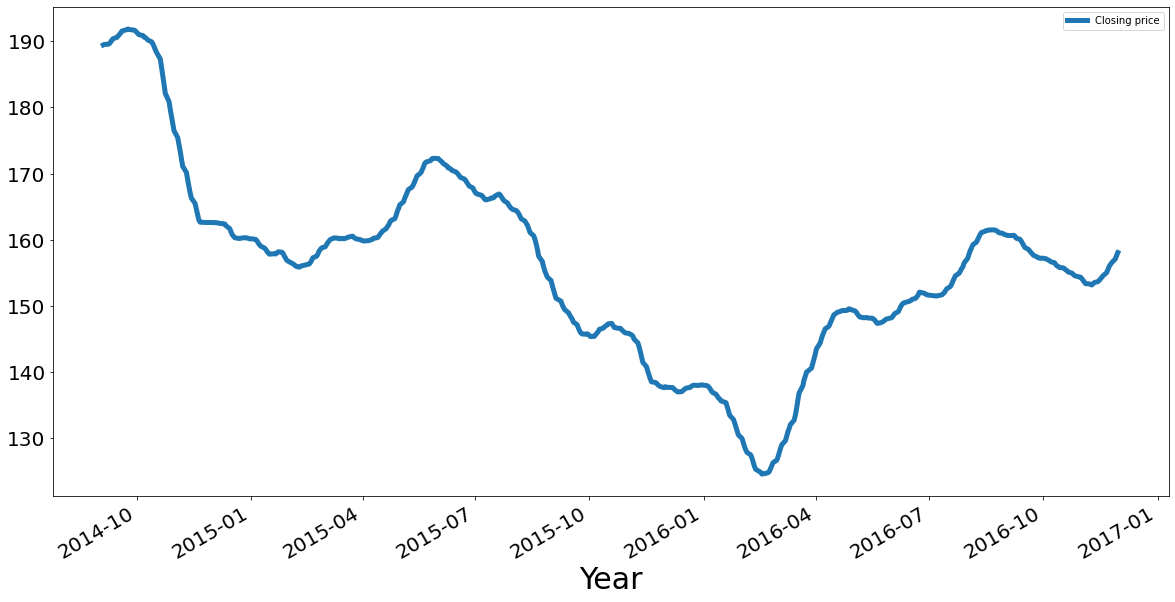

In [ ]:
# Seeing the trend more clearly
df.rolling(24).mean().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)
# Overall a rise here

Text(0.5, 0, 'Year')

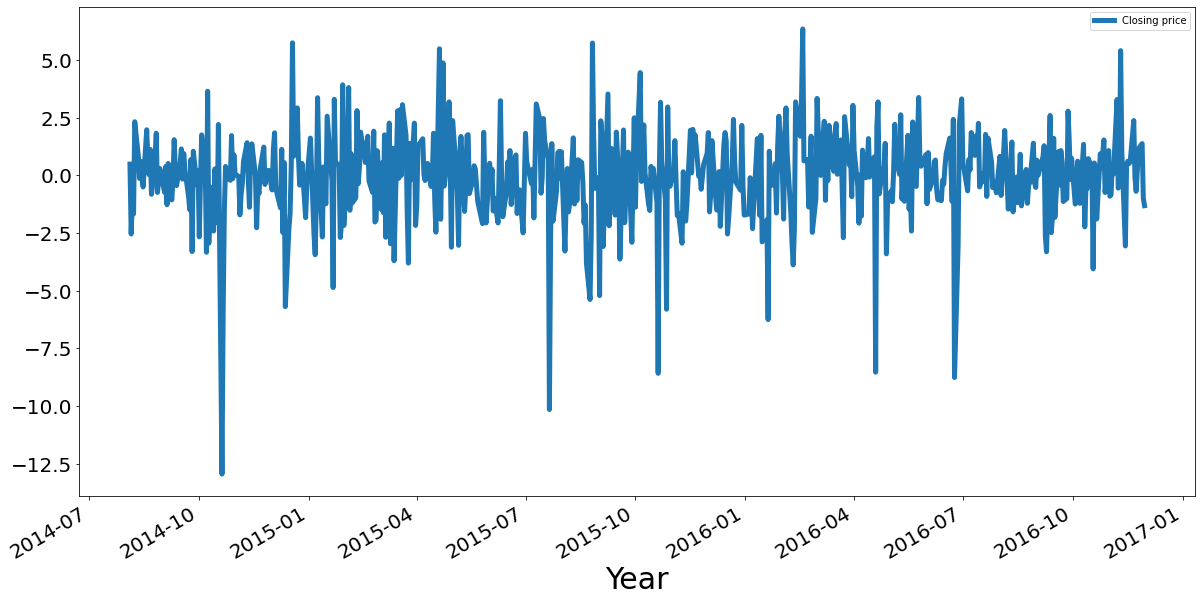

In [ ]:
# We can see that there is no specific seasonality here
# Removing trend
df.diff().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

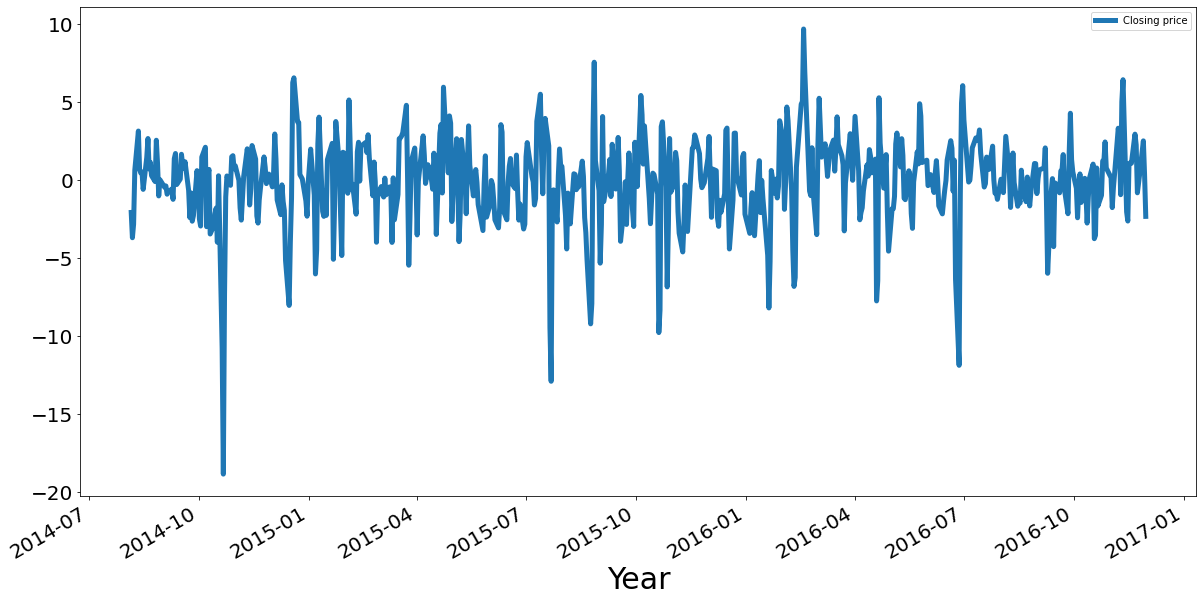

In [ ]:
# 2nd order differencing
df.diff(periods=2).plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

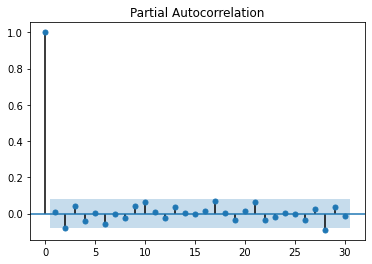

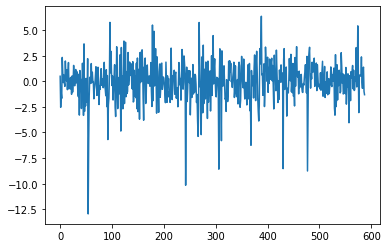

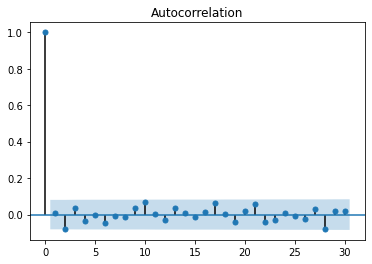

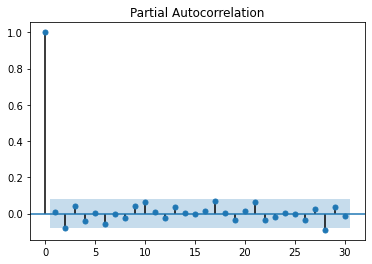

In [ ]:
# Let's take a look at its auto-corelation plots
# Before that we'll have to do manual differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def difference(data, lag):
    diff= []
    
    for i in range(lag, len(data)):
        value = data[i] - data[i-lag]
        diff.append(value)
    return pd.Series(diff)

df_close = df['Closing price']
X = df_close.values
diff = difference(X,1)
plt.plot(diff)
df_diff = pd.DataFrame(diff)
plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)

In [ ]:
# Forecasting
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
df = df.astype(np.float64) 
Y = df.values
size = int(len(Y)*0.66)
train, test = Y[0:size], Y[size:len(Y)]


In [ ]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f'%(pred, obs))


predicted=122.568396, expected=126.099998
predicted=125.937498, expected=132.449997
predicted=132.304239, expected=133.080002
predicted=132.936233, expected=133.770004
predicted=133.628367, expected=132.399994
predicted=132.255223, expected=132.800003
predicted=132.656619, expected=134.500000
predicted=134.361294, expected=132.029999
predicted=131.885391, expected=131.029999
predicted=130.883231, expected=134.369995
predicted=134.232010, expected=136.300003
predicted=136.167214, expected=137.800003
predicted=137.671306, expected=137.800003
predicted=137.671628, expected=140.149994
predicted=140.027799, expected=139.070007
predicted=138.945430, expected=140.410004
predicted=140.289061, expected=140.190002
predicted=140.068814, expected=142.360001
predicted=142.244470, expected=142.779999
predicted=142.665787, expected=142.960007
predicted=142.846518, expected=144.789993
predicted=144.681268, expected=147.039993
predicted=146.937035, expected=147.089996
predicted=146.987411, expected=148

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=155.626989, expected=158.289993
predicted=158.231986, expected=155.809998
predicted=155.747446, expected=154.050003
predicted=153.984273, expected=155.660004
predicted=155.597406, expected=153.839996
predicted=153.774119, expected=154.869995
predicted=154.806159, expected=154.449997
predicted=154.385499, expected=155.529999
predicted=155.467624, expected=156.110001
predicted=156.048815, expected=154.979996
predicted=154.916835, expected=153.979996
predicted=153.915106, expected=156.770004
predicted=156.710373, expected=158.289993
predicted=158.233265, expected=158.110001
predicted=158.053046, expected=158.850006
predicted=158.794512, expected=157.610001
predicted=157.552341, expected=156.460007
predicted=156.400353, expected=157.080002
predicted=157.021587, expected=156.880005
predicted=156.821332, expected=155.669998
predicted=155.609236, expected=157.020004
predicted=156.961798, expected=154.789993
predicted=154.727859, expected=154.289993
predicted=154.227069, expected=153

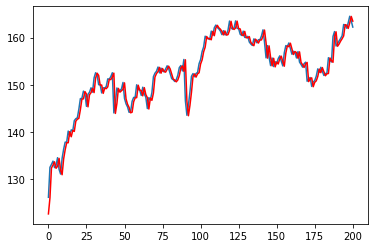

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(test, predictions)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

3.1982815526323543

#LSTM model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

importing the training data

In [ ]:
data = pd.read_csv('IBM_stock.csv')


choosing the close column

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training

scaling the values in the range of 0-1 for best preformances

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(589, 1)

preparing the data for LSTM

since its a time series problem we took 60 as timestep for our learning : given 60 closing values as an input data the 61st value is our output

In [ ]:
X_train = []
y_train = []

for i in range (60,589): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

ps : LSTM take a 3D tensor (seq_len,timestep,batch_size)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(529, 60, 1)

building the model

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
17/17 - 9s - loss: 0.0399
Epoch 2/20
17/17 - 3s - loss: 0.0095
Epoch 3/20
17/17 - 3s - loss: 0.0072
Epoch 4/20
17/17 - 3s - loss: 0.0060
Epoch 5/20
17/17 - 3s - loss: 0.0068
Epoch 6/20
17/17 - 3s - loss: 0.0079
Epoch 7/20
17/17 - 3s - loss: 0.0059
Epoch 8/20
17/17 - 3s - loss: 0.0051
Epoch 9/20
17/17 - 3s - loss: 0.0060
Epoch 10/20
17/17 - 3s - loss: 0.0048
Epoch 11/20
17/17 - 3s - loss: 0.0047
Epoch 12/20
17/17 - 3s - loss: 0.0042
Epoch 13/20
17/17 - 3s - loss: 0.0043
Epoch 14/20
17/17 - 3s - loss: 0.0046
Epoch 15/20
17/17 - 3s - loss: 0.0038
Epoch 16/20
17/17 - 3s - loss: 0.0038
Epoch 17/20
17/17 - 3s - loss: 0.0039
Epoch 18/20
17/17 - 3s - loss: 0.0036
Epoch 19/20
17/17 - 3s - loss: 0.0037
Epoch 20/20
17/17 - 3s - loss: 0.0040


ploting the training loss

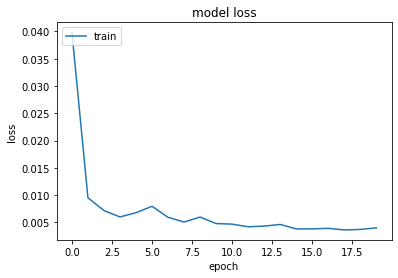

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

testing the model on new data

In [ ]:
testData = pd.read_csv('IBM_stock.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(529, 60, 1)

In [ ]:
y_pred = model.predict(X_test) #predicting the new values


In [ ]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting


ploting the results

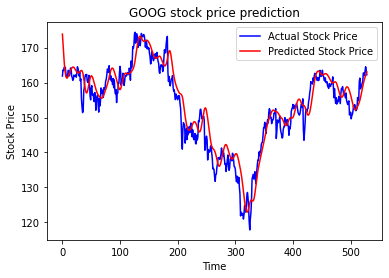

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOG stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(y_test, predicted_price)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

15.992904502728457

#Result

MSE value for Exponential Model is 3.4172334666694675

MSE value for ARIMA Model is 3.1982815526323543

MSE value for LSTM Model is 15.992904502728457

 As MSE value is minimum for ARIMA Model. So, for this dataset ARIMA (1, 0,1) model can be used.

Although this is still not a best model exist, there are many advance stock prediction models are available and also here we have considered only the previous stock data but analyzing the market and taking all the effect during the building of any stock prediction model will give the best results.